In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Discrete Fourier Transform

From the previous exercises, we have worked with signals characterized by wave parameters such as period/frequency, amplitude, phase. But these are easy for simple periodic signals, such as sine or cosine waves.


<div>
<img src="./wave_parameters.jpg" width="300"/>
</div>

For complicated waves, it is not easy to characterize them like that. For example, the following is a relatively more complicated wave.

There are more complicated cases in real world, it would be great if we have a method that we can use to analyze the characteristics of the wave. The Fourier Transform can be used for this purpose, which it decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. 

<div>
<img src="./Signal_domain.png" width="300"/>
</div>

The Fourier transform can be applied to continuous or discrete waves. We will only talk about the Discrete Fourier Transform (DFT).



# DFT
The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. It is defined as:

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$

where:

<ul>
<li>N = number of samples</li>
<li>n = current sample</li>
<li>k = current frequency, where $𝑘∈[0,𝑁−1]$</li>
<li>$x_n=$the sine value at sample n</li>
<li>$X_k=$The DFT which include information of both amplitude and phase</li>
</ul> 

The last expression in the above equation derived from the Euler’s formula, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$


Due to the nature of the transform, $X_0 = \sum_{n=0}^{N-1}x_n$. If $𝑁$ is an odd number, the elements $X_1, X_2, ..., X_{(N-1)/2}$ contain the positive frequency terms and the elements $X_{(N+1)/2}, ..., X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. While if $𝑁$ is even, the elements $X_1, X_2, ..., X_{N/2-1}$ contain the positive frequency terms, and the elements $X_{N/2},...,X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. In the case that our input signal $x$ is a real-valued sequence, the DFT output $X_n$ for positive frequencies is the conjugate of the values  $X_n$ for negative frequencies, the spectrum will be symmetric. Therefore, usually we only plot the DFT corresponding to the positive frequencies.

Note that the $X_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi kn/N}$ of function $x_n$. The amplitude and phase of the signal can be calculated as:

$amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$

$phase = atan2(Im(X_k), Re(X_k))$

where $𝐼𝑚(X_k)$ and $𝑅𝑒(X_k)$ are the imagery and real part of the complex number, $𝑎𝑡𝑎𝑛2$ is the two-argument form of the $𝑎𝑟𝑐𝑡𝑎𝑛$ function.

The amplitudes returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. Note that doing this will divide the power between the positive and negative sides, if the input signal is real-valued sequence as we described above, the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and instead of divide $N$, we divide $𝑁/2$ to get the amplitude corresponding to the time domain signal.

## Excercise:
Generate 3 wave functions with frequencies $f_1$ Hz, $f_2$ Hz, and $f_3$ Hz, amplitudes $A_1$, $A_2$ and $A_3$, and phase all zeros. Add this 3 functions waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.
    

# Generate a composed signal

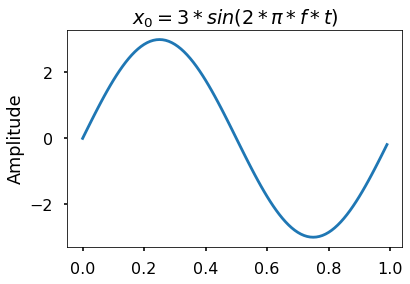

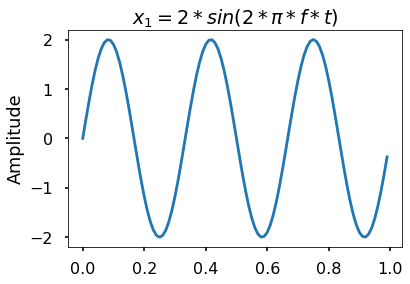

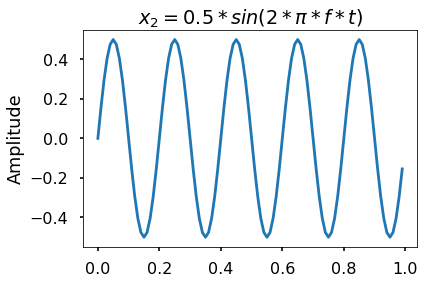

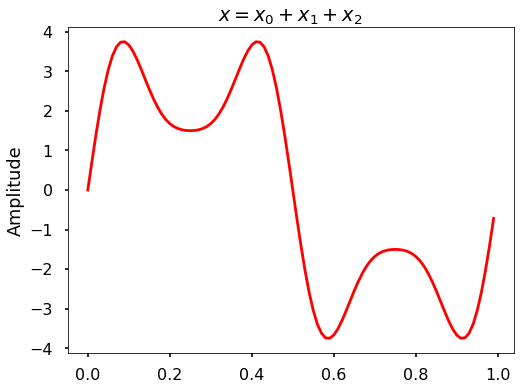

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

#1st. signal
freq = 1.
x_0 = 3*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_0=3*sin(2*\pi*f*t)$")
plt.plot(t,x_0)
plt.show()
#2nd. signal
freq = 3
x_1= 2*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_1=2*sin(2*\pi*f*t)$")
plt.plot(t,x_1)
plt.show()
#3rd. Signal
freq = 5
x_2= 0.5*np.sin(2*np.pi*freq*t)
plt.ylabel('Amplitude')
plt.title("$x_2=0.5*sin(2*\pi*f*t)$")
plt.plot(t,x_2)

x =x_0+x_1+x_2
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title("$x=x_0+x_1+x_2$")

plt.show()




## Excercise: 

Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. 

Implement the following equation:


$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} $

where:

<ul>
<li>N = number of samples</li>
<li>n = current sample</li>
<li>k = current frequency, where $𝑘∈[0,𝑁−1]$</li>
<li>$x_n=$the sine value at sample n</li>
<li>$X_k=$The DFT which include information of both amplitude and phase</li>
</ul> 

In [3]:


def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    #Implement your code here:
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N,1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(x, e)
    return X




# Calculate the frequency

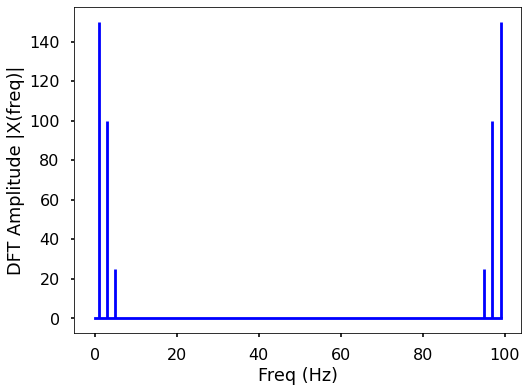

In [4]:


X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()




We can see from here that the output of the DFT is symmetric at half of the sampling rate (you can try different sampling rate to test). This half of the sampling rate is called Nyquist frequency or the folding frequency, it is named after the electronic engineer Harry Nyquist. He and Claude Shannon have the Nyquist-Shannon sampling theorem, which states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, thus the **highest frequency output from the DFT is half the sampling rate**.

# Zoom-in into the frequencies

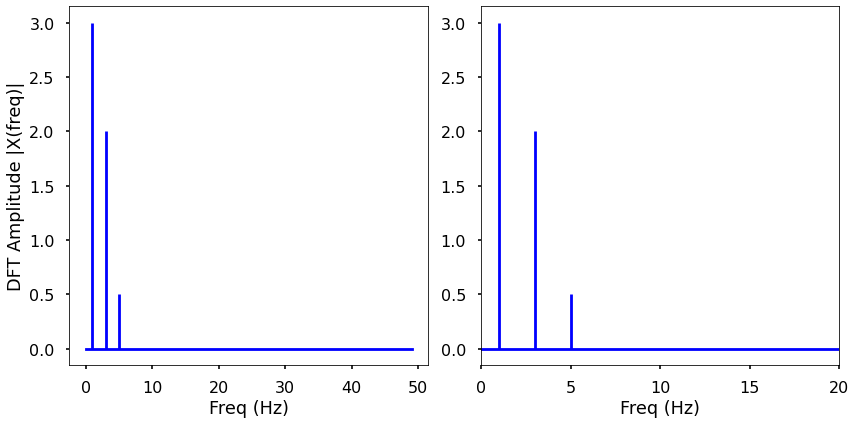

In [5]:

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()



We can see by plotting the first half of the DFT results, we can see 3 clear peaks at frequency $f_1$ Hz, $f_2$ Hz, and $f_3$ Hz, with amplitude $A_1$, $A_2$, $A_3$ as expected. This is how we can use the DFT to analyze an arbitrary signal by decomposing it to simple sine waves.

# The inverse DFT
$x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$

In [6]:

def iDFT(X):
    """
    Function to calculate the inverse 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    #Implement your code here:
    
    return x

Text(0, 0.5, 'f(t)')

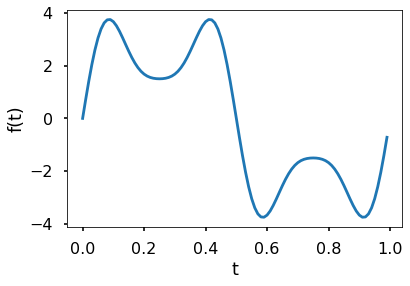

In [7]:
x_reconstructed=iDFT(X)
plt.plot(t,x_reconstructed)
plt.xlabel('t')
plt.ylabel('f(t)')

# The limit of DFT
The main issue with the above DFT implementation is that it is not efficient if we have a signal with many data points. It may take a long time to compute the DFT if the signal is large.

Use the following function "signal_generator" to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

In [8]:

def signal_generator(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x




In [9]:
# sampling rate =2000
sr = 2000
%timeit DFT(signal_generator(sr))

286 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# sampling rate 20000
sr = 5000
%timeit DFT(signal_generator(sr))

1.4 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
